In [1]:
import pandas as pd

# load the data
data = pd.read_csv('clustered_results_with_representatives.csv')

# count types unique values
print(data['cluster_representative'].value_counts())


cluster_representative
Parking Enforcement Transportation - Traffic Division Enforcement & Abandoned Vehicles Parking Enforcement             5418
Mattress Pickup Public Works Department Sanitation Mattress_Pickup                                                     2628
Requests for Street Cleaning Public Works Department Street Cleaning Requests for Street Cleaning                      2016
Improper Storage of Trash (Barrels) Public Works Department Code Enforcement Improper Storage of Trash (Barrels)       1952
Missed Bulk Item Pickup: District 02 Public Works Department Sanitation Missed Trash/Recycling/Yard Waste/Bulk Item    1409
Schedule a Bulk Item Pickup Public Works Department Sanitation Schedule a Bulk Item Pickup                             1313
Request for Pothole Repair Public Works Department Highway Maintenance Request for Pothole Repair                      1200
Unshoveled Sidewalk Public Works Department Code Enforcement Unshoveled Sidewalk                             

In [6]:
import pandas as pd

# 加载CSV文件
csv_path = 'clustered_results_with_categories.csv'  # 请替换为你的CSV文件路径
df = pd.read_csv(csv_path)

# 定义需要更新的类别映射
specified_updates = {
    "SCH1/05Maintenance Complaint - Residential Inspectional Services Housing Maintenance Complaint - Residential": "Housing and Building Management",
    "SCH1/6Unsatisfactory Living Conditions Inspectional Services Housing Unsatisfactory Living Conditions": "Housing and Building Management",
    "Heat - Excessive  Insufficient Inspectional Services Housing Heat - Excessive  Insufficient": "Housing and Building Management",
}

# 应用更新到DataFrame
df.loc[df['cluster_representative'].isin(specified_updates.keys()), 'Category'] = df['cluster_representative'].map(specified_updates)

# 保存更新后的DataFrame到新的CSV文件
updated_csv_path_v2 = 'clustered_results_with_categories_2.csv'
df.to_csv(updated_csv_path_v2, index=False)

# 输出更新后的文件路径，确保操作成功
print(f"Updated CSV has been saved to: {updated_csv_path_v2}")


Updated CSV has been saved to: clustered_results_with_categories_2.csv


In [12]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# load the data
data_path = 'clustered_results_with_categories.csv'  
df = pd.read_csv(data_path)


boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
geojson_path = 'BPDA_Neighborhood_Boundaries.geojson'  # Change this to the path of your GeoJSON file
folium.GeoJson(geojson_path, name='Boston Neighborhoods').add_to(boston_map)

# define categories
categories = df['Category'].unique()

# 
for category in categories:

    category_data = df[df['Category'] == category][['latitude', 'longitude']]
    heat_data = [[row['latitude'], row['longitude']] for index, row in category_data.iterrows()]
    
    HeatMap(heat_data).add_to(folium.FeatureGroup(name=category).add_to(boston_map))

folium.LayerControl().add_to(boston_map)
boston_map.save('boston_issues_heatmaps.html')
print("Heatmaps have been saved to 'boston_issues_heatmaps.html'")


Heatmaps have been saved to 'boston_issues_heatmaps.html'


In [13]:
import folium
import pandas as pd

data_path = 'clustered_results_with_categories.csv'  
df = pd.read_csv(data_path)

boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
geojson_path = 'BPDA_Neighborhood_Boundaries.geojson'  # Change this to the path of your GeoJSON file
folium.GeoJson(geojson_path, name='Boston Neighborhoods').add_to(boston_map)

color_map = {
    "Traffic and Vehicle Management": "red",
    "Urban Cleaning and Environmental Maintenance": "blue",
    "Infrastructure and Public Facilities Maintenance": "green",
    "Housing and Building Management": "purple",
    "Public Safety and Health": "orange",
    "Municipal Services and Requests": "darkblue",
    "Water and Drainage Management": "lightgray",
}

feature_groups = {category: folium.FeatureGroup(name=category, show=False) for category in color_map.keys()}

for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_map[row['Category']],
        fill=True,
        fill_color=color_map[row['Category']],
        fill_opacity=0.6,
        popup=row['Category'],
    ).add_to(feature_groups[row['Category']])

for feature_group in feature_groups.values():
    feature_group.add_to(boston_map)

folium.LayerControl().add_to(boston_map)

boston_map.save('boston_issues_circle_markers.html')

print("Circle markers with all categories correctly displayed have been saved to 'boston_issues_circle_markers.html'")


Circle markers with all categories correctly displayed have been saved to 'boston_issues_circle_markers.html'


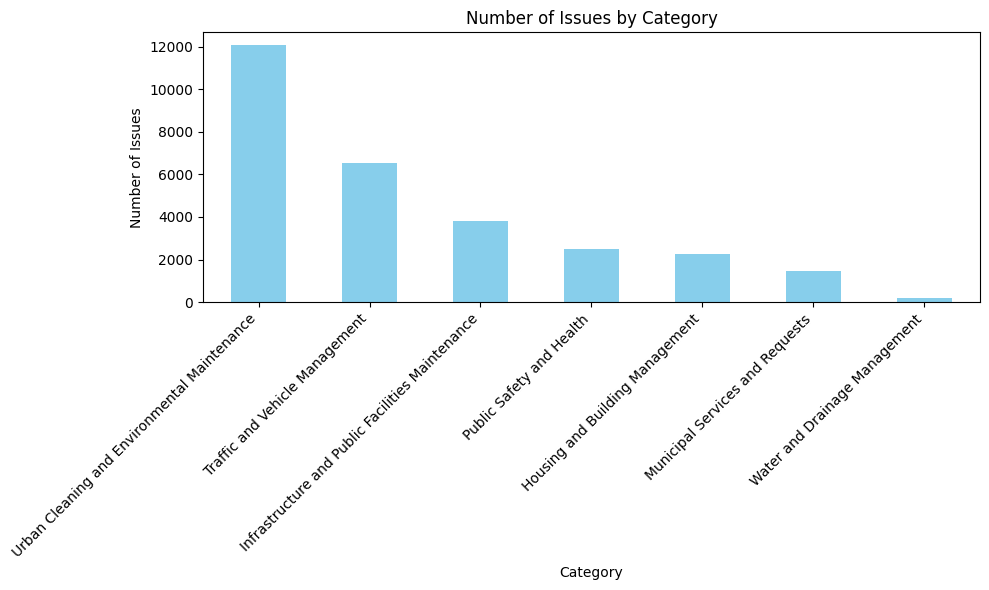

In [9]:
category_counts = df['Category'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Issues by Category')
plt.xlabel('Category')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# analyze the plot above
# The plot shows the number of issues in each category. The category with the highest number of issues is "Urban Cleaning and Environmental Maintenance". The category with the fewest issues is "Water and Drainage Management". This information can help city officials understand the distribution of issues across different categories and prioritize resources accordingly.